In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/callsf0d4f5a.csv")


In [5]:
data

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...


In [6]:
from itertools import count


# Convert the datetime columns, handling errors and inferring formats
data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'], errors='coerce', infer_datetime_format=True)
data['agent_assigned_datetime'] = pd.to_datetime(data['agent_assigned_datetime'], errors='coerce', infer_datetime_format=True)
data['call_end_datetime'] = pd.to_datetime(data['call_end_datetime'], errors='coerce', infer_datetime_format=True)

# Calculate AHT and AST
data['AHT'] = (data['call_end_datetime'] - data['agent_assigned_datetime']).dt.total_seconds()/data.count(axis=1)
data['AST'] = (data['agent_assigned_datetime'] - data['call_start_datetime']).dt.total_seconds()/data.count(axis=1)
print(data[['AHT', 'AST']])

<ipython-input-6-779616d7a304>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['call_start_datetime'] = pd.to_datetime(data['call_start_datetime'], errors='coerce', infer_datetime_format=True)
<ipython-input-6-779616d7a304>:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['agent_assigned_datetime'] = pd.to_datetime(data['agent_assigned_datetime'], errors='coerce', infer_datetime_format=True)


              AHT   AST
0      265.714286  52.5
1      102.857143  22.5
2      162.857143  60.0
3       60.000000  37.5
4       77.142857  75.0
...           ...   ...
71805  240.000000  67.5
71806   68.571429  22.5
71807   51.428571  45.0
71808   34.285714  45.0
71809   25.714286  75.0

[71810 rows x 2 columns]


<ipython-input-6-779616d7a304>:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['call_end_datetime'] = pd.to_datetime(data['call_end_datetime'], errors='coerce', infer_datetime_format=True)


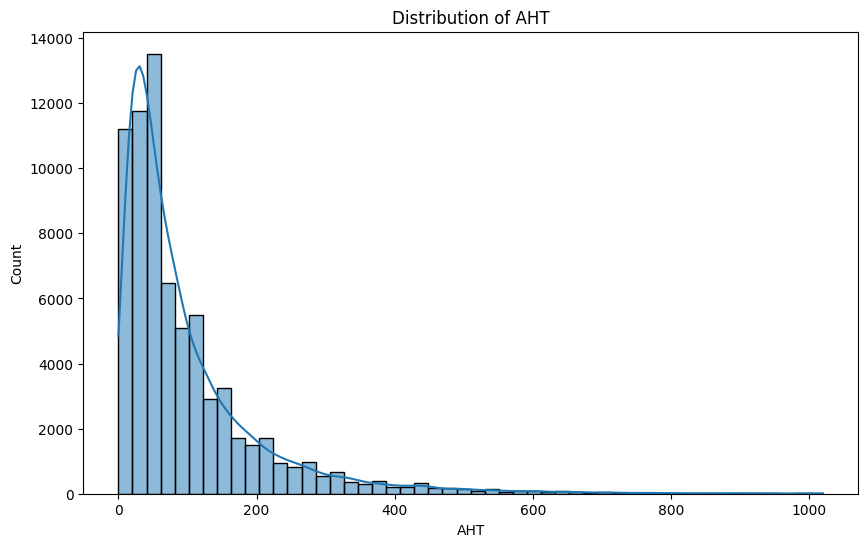

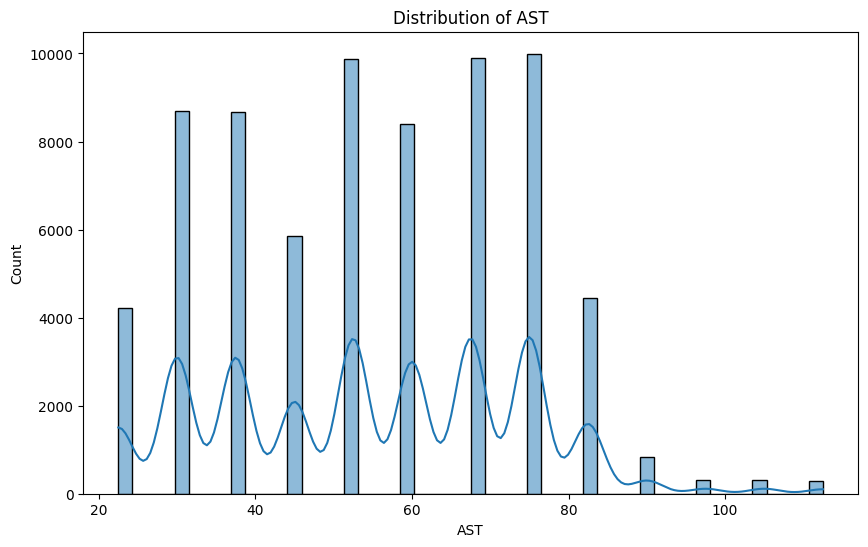

In [7]:


# Plot the distribution of AHT
plt.figure(figsize=(10, 6))
sns.histplot(data['AHT'], bins=50, kde=True)
plt.title('Distribution of AHT')
plt.show()

# Plot the distribution of AST
plt.figure(figsize=(10, 6))
sns.histplot(data['AST'], bins=50, kde=True)
plt.title('Distribution of AST')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

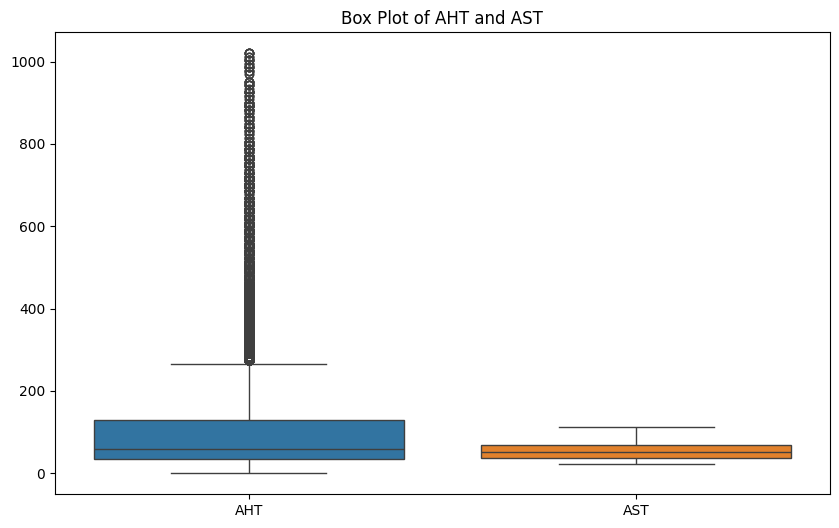

In [8]:
# Identify outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['AHT', 'AST']])
plt.title('Box Plot of AHT and AST')
plt.show()

# Remove outliers (optional) using IQR method or other techniques.

In [9]:
# Segment data by call type, agent, or other relevant factors
# Calculate and compare AHT and AST for different segments

# Example: Segmenting by call type
aht_by_call_type = data.groupby('agent_id')['AHT'].mean()
ast_by_call_type = data.groupby('agent_id')['AST'].mean()

print(aht_by_call_type)
print(ast_by_call_type)

agent_id
102574    514.285714
103651    106.768936
106000     98.457649
107876    141.428571
112609    121.558442
113217     96.565350
114609    141.236674
119952    105.783133
121149    108.663594
126555    105.736783
131036     96.054756
132311     88.473581
136010     89.292149
136065    257.142857
136855     99.422598
139291    111.908092
140146    374.285714
144120    100.360902
149315     99.384410
153182    100.329670
153460     95.536569
158319     97.339149
158530     99.868938
161354     51.428571
163203    110.785714
163887     98.848921
167843    113.463515
171021    100.327526
171689    119.090909
175269     97.402597
175271    113.981763
176703    114.177898
178998    108.521739
181820     98.986941
183138    102.332362
184151    130.204082
187770     81.428571
189362    126.203008
192245     92.274286
198489     73.261456
198686     90.029762
201204    175.102041
202868    101.917418
204674    102.775120
208992     87.037037
213093     99.872449
214289    102.857143
2154

In [10]:
reason_data=pd.read_csv("/content/drive/MyDrive/reason18315ff.csv")
data_type=reason_data['primary_call_reason'].unique().dtype
print(data_type)

object


In [11]:
reason_data['primary_call_reason'].isnull().sum()

0

In [12]:
reason_data['primary_call_reason'] = reason_data['primary_call_reason'].str.lower()

In [13]:
reason_data['primary_call_reason'] = reason_data['primary_call_reason'].str.strip()

In [14]:
reason_data['primary_call_reason'] = pd.Categorical(reason_data['primary_call_reason'])

In [15]:
data_type=reason_data['primary_call_reason'].unique()
data_type

['voluntary  cancel', 'booking', 'irrops', 'upgrade', 'seating', ..., 'digital support', 'traveler   updates', 'digital  support', 'mileage  plus', 'voluntary  change']
Length: 33
Categories (33, object): ['baggage', 'booking', 'check in', 'check-in', ..., 'voluntary  cancel', 'voluntary  change', 'voluntary cancel', 'voluntary change']

In [16]:
import pandas as pd

# Assuming 'reason_data' is your DataFrame
unique_values = reason_data['primary_call_reason'].unique()

# 1. Standardize case
reason_data['primary_call_reason'] = reason_data['primary_call_reason'].str.lower()

# 2. Remove leading/trailing spaces
reason_data['primary_call_reason'] = reason_data['primary_call_reason'].str.strip()

# 3. Handle specific inconsistencies
replacements = {
    'check-in': 'check in',  # Example: Replacing 'check-in' with 'check in'
    'voluntary  cancel': 'voluntary cancel',  # Example: Removing extra space
    'voluntary  change': 'voluntary change',  # Example: Removing extra space
    'digital  support': 'digital support',  # Example: Removing extra space
    'traveler   updates': 'traveler updates',  # Example: Removing extra space
    'mileage   plus': 'mileage plus',  # Example: Removing extra space
    'digital   support': 'digital support',
    'other  topics': 'other topics',
    'post-flight': 'post flight',
    'products & services': 'products and services',
    'traveler  updates': 'traveler updates',
    'voluntary   change': 'voluntary change',
    'mileage  plus': 'mileage plus'


}
reason_data['primary_call_reason'] = reason_data['primary_call_reason'].replace(replacements)

# 4. Convert to categorical (optional)
reason_data['primary_call_reason'] = pd.Categorical(reason_data['primary_call_reason'])

print(reason_data['primary_call_reason'].unique())

['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating', ..., 'disability', 'unaccompanied minor', 'baggage', 'traveler updates', 'etc']
Length: 20
Categories (20, object): ['baggage', 'booking', 'check in', 'checkout', ..., 'unaccompanied minor', 'upgrade', 'voluntary cancel', 'voluntary change']


In [17]:
data_type=reason_data['primary_call_reason'].unique()
print(data_type)

['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating', ..., 'disability', 'unaccompanied minor', 'baggage', 'traveler updates', 'etc']
Length: 20
Categories (20, object): ['baggage', 'booking', 'check in', 'checkout', ..., 'unaccompanied minor', 'upgrade', 'voluntary cancel', 'voluntary change']


In [18]:
reason_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   call_id              66653 non-null  int64   
 1   primary_call_reason  66653 non-null  category
dtypes: category(1), int64(1)
memory usage: 586.6 KB


In [19]:
# Assuming 'reason_data' is your DataFrame
reason_data.dropna(inplace=True)

In [20]:
data_type=reason_data['primary_call_reason'].unique()
print(data_type)

['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating', ..., 'disability', 'unaccompanied minor', 'baggage', 'traveler updates', 'etc']
Length: 20
Categories (20, object): ['baggage', 'booking', 'check in', 'checkout', ..., 'unaccompanied minor', 'upgrade', 'voluntary cancel', 'voluntary change']


In [21]:
# Assuming 'reason_data' is your DataFrame and you want to drop rows with blank/null values in 'primary_call_reason' column
reason_data.dropna(subset=['primary_call_reason'], inplace=True)

In [22]:
data_type=reason_data['primary_call_reason'].unique()
print(data_type)

['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating', ..., 'disability', 'unaccompanied minor', 'baggage', 'traveler updates', 'etc']
Length: 20
Categories (20, object): ['baggage', 'booking', 'check in', 'checkout', ..., 'unaccompanied minor', 'upgrade', 'voluntary cancel', 'voluntary change']


In [23]:
# Assuming 'reason_data' is your DataFrame and 'primary_call_reason' is the column
all_unique_values = reason_data['primary_call_reason'].unique()

# Print all unique values
for value in all_unique_values:
    print(value)

# Or, print them as a list
print(list(all_unique_values))

voluntary cancel
booking
irrops
upgrade
seating
mileage plus
checkout
voluntary change
post flight
check in
other topics
communications
schedule change
products and services
digital support
disability
unaccompanied minor
baggage
traveler updates
etc
['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating', 'mileage plus', 'checkout', 'voluntary change', 'post flight', 'check in', 'other topics', 'communications', 'schedule change', 'products and services', 'digital support', 'disability', 'unaccompanied minor', 'baggage', 'traveler updates', 'etc']


In [24]:
data_type=reason_data['primary_call_reason'].unique()
print(data_type)

['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating', ..., 'disability', 'unaccompanied minor', 'baggage', 'traveler updates', 'etc']
Length: 20
Categories (20, object): ['baggage', 'booking', 'check in', 'checkout', ..., 'unaccompanied minor', 'upgrade', 'voluntary cancel', 'voluntary change']


In [25]:
# Assuming 'reason_data' and 'data' are your DataFrames
merged_data = pd.merge(data, reason_data, on='call_id', how='inner')

In [26]:
merged_data

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,265.714286,52.5,voluntary cancel
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,102.857143,22.5,booking
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,162.857143,60.0,irrops
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,60.000000,37.5,upgrade
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,77.142857,75.0,seating
...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,85.714286,45.0,mileage plus
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,240.000000,67.5,post flight
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,68.571429,22.5,upgrade
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,51.428571,45.0,upgrade


<Figure size 2000x1000 with 0 Axes>

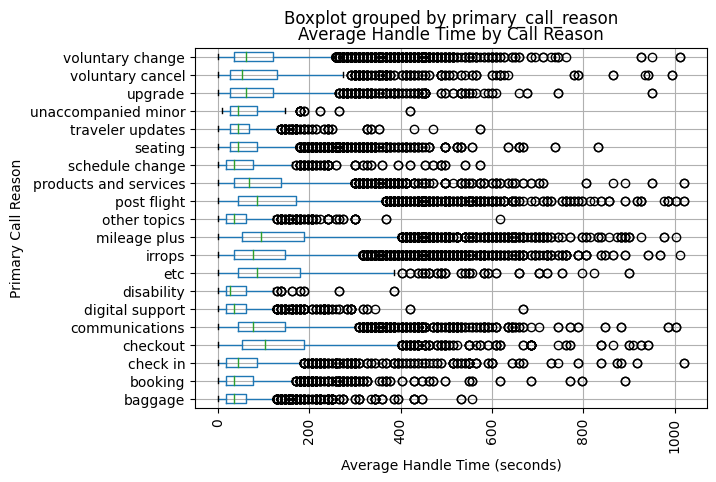

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
merged_data.boxplot(column='AHT', by='primary_call_reason', vert=False)
plt.title('Average Handle Time by Call Reason')
plt.xlabel('Average Handle Time (seconds)')
plt.ylabel('Primary Call Reason')
_ = plt.xticks(rotation=90)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

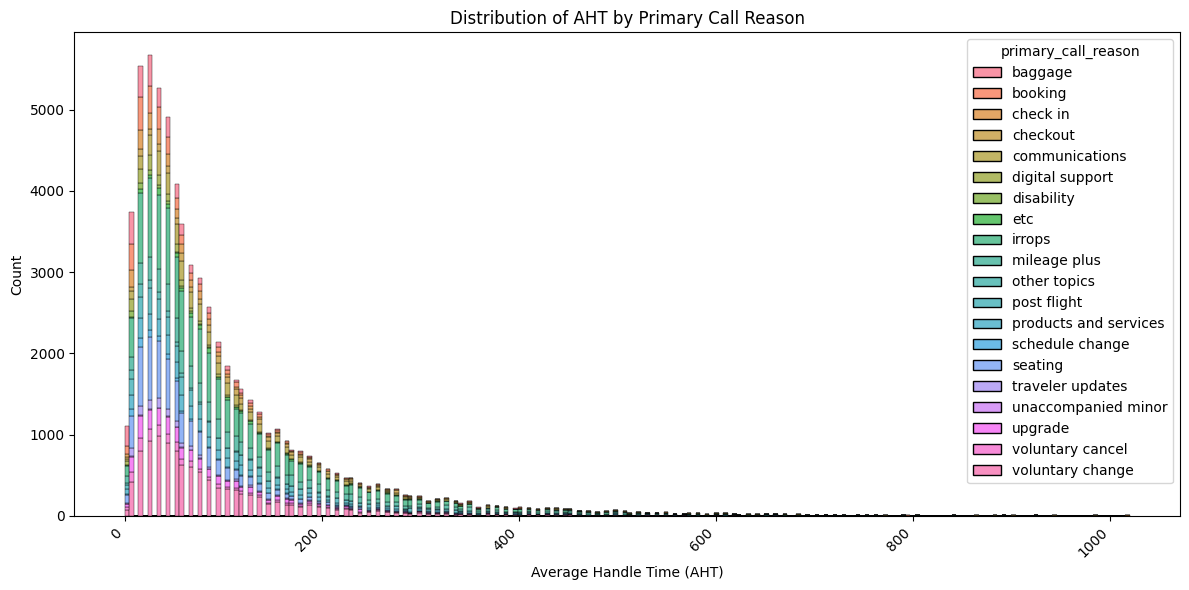

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your DataFrame after merging
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.histplot(data=merged_data, x='AHT', hue='primary_call_reason', multiple='stack')
plt.title('Distribution of AHT by Primary Call Reason')
plt.xlabel('Average Handle Time (AHT)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

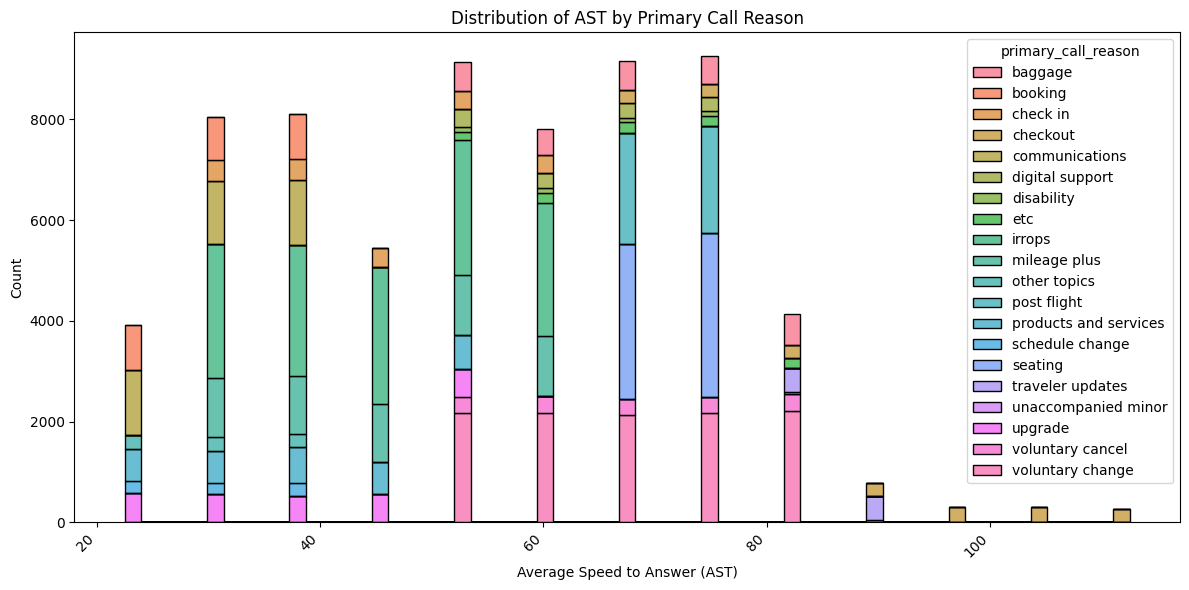

In [74]:


plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.histplot(data=merged_data, x='AST', hue='primary_call_reason', multiple='stack')
plt.title('Distribution of AST by Primary Call Reason')
plt.xlabel('Average Speed to Answer (AST)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


In [32]:
merged_data.describe()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,AHT,AST
count,6.665300e+04,6.665300e+04,66653.000000,66653,66653,66653,66653.000000,66653.000000
mean,4.993883e+09,5.006607e+09,564623.782936,2024-08-16 11:00:46.465725440,2024-08-16 11:08:03.437804800,2024-08-16 11:19:40.614525952,99.596674,54.621510
min,1.316420e+05,4.430700e+05,102574.000000,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:17:00,0.000000,22.500000
25%,2.481353e+09,2.514373e+09,347606.000000,2024-08-09 11:25:00,2024-08-09 11:32:00,2024-08-09 11:45:00,34.285714,37.500000
50%,4.987649e+09,5.006072e+09,591778.000000,2024-08-17 09:12:00,2024-08-17 09:19:00,2024-08-17 09:31:00,60.000000,52.500000
75%,7.495496e+09,7.509114e+09,786323.000000,2024-08-24 14:22:00,2024-08-24 14:29:00,2024-08-24 14:40:00,128.571429,67.500000
max,9.999806e+09,9.999935e+09,993862.000000,2024-08-31 23:55:00,2024-08-31 23:59:00,2024-09-01 01:33:00,1020.000000,112.500000
std,2.889665e+09,2.883582e+09,257493.355821,NaN,NaN,NaN,110.618125,18.894416


In [33]:
customer_data=pd.read_csv("/content/drive/MyDrive/customers2afd6ea.csv")

In [34]:
customer_data

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


In [35]:
# Assuming 'customer_data' is your DataFrame
customer_data.fillna(0, inplace=True)

In [36]:
customer_data

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,0.0
2,2416856629,Jeffery Dixon,0.0
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,0.0
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,0.0
71808,8095620266,Christine Oneal,1.0


In [37]:
merged_call_data = pd.merge(merged_data, customer_data, on='customer_id', how='inner')

In [38]:
merged_call_data

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason,customer_name,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,265.714286,52.5,voluntary cancel,Matthew Foster,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,102.857143,22.5,booking,Tammy Walters,0.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,162.857143,60.0,irrops,Jeffery Dixon,0.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,60.000000,37.5,upgrade,David Wilkins,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,77.142857,75.0,seating,Elizabeth Daniels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,85.714286,45.0,mileage plus,Kevin Warner,2.0
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,240.000000,67.5,post flight,Dennis Singleton DDS,0.0
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,68.571429,22.5,upgrade,Paul Mitchell,1.0
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,51.428571,45.0,upgrade,Kaylee Lang,0.0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

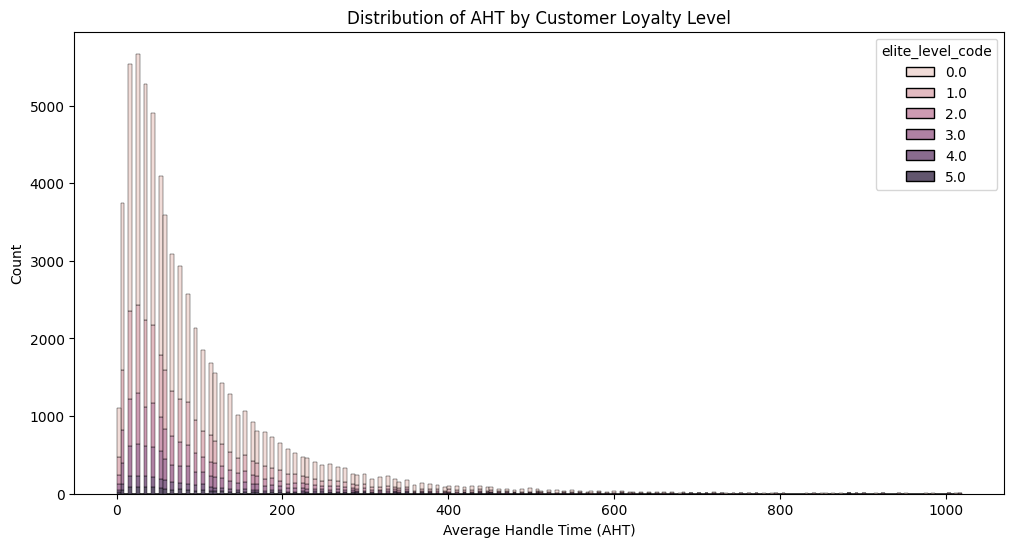

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

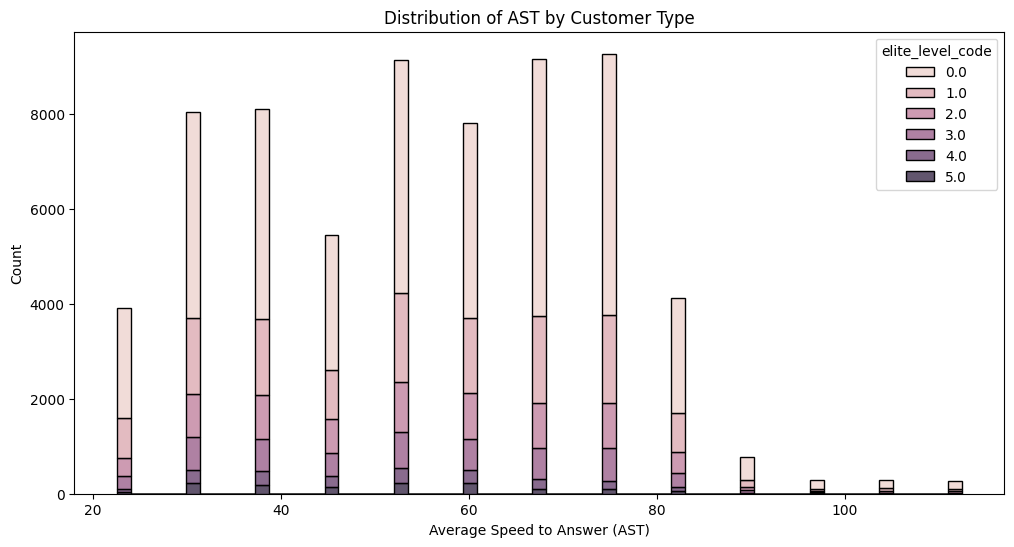

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

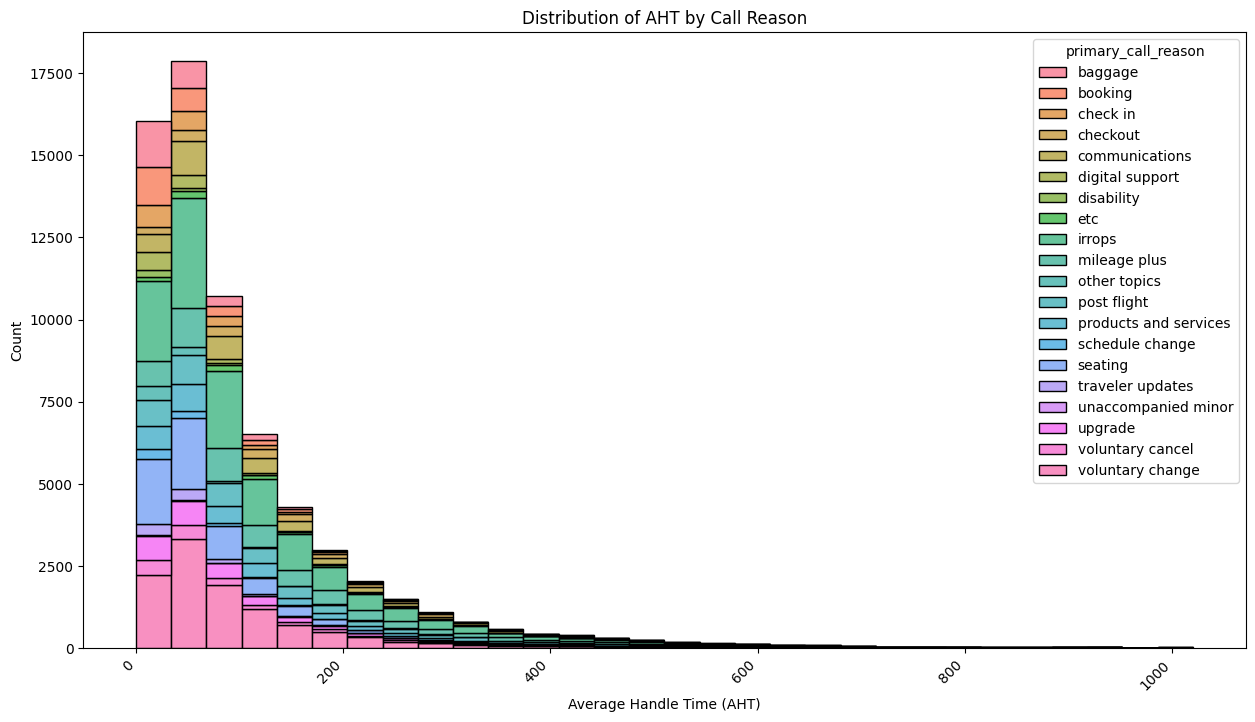

In [75]:

# histogram plot

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of AHT by Customer Segment (e.g., loyalty level)
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_call_data, x='AHT', hue='elite_level_code', multiple='stack')
plt.title('Distribution of AHT by Customer Loyalty Level')
plt.xlabel('Average Handle Time (AHT)')
plt.ylabel('Count')
plt.show()


# Histogram of AST by Customer Segment (e.g., customer type)
plt.figure(figsize=(12, 6))
sns.histplot(data=merged_call_data, x='AST', hue='elite_level_code', multiple='stack')
plt.title('Distribution of AST by Customer Type')
plt.xlabel('Average Speed to Answer (AST)')
plt.ylabel('Count')
plt.show()


# Histogram of AHT by Call Reason and Customer Segment (e.g., loyalty level)
plt.figure(figsize=(15, 8))
sns.histplot(data=merged_call_data, x='AHT', hue='primary_call_reason', multiple='stack',
             bins=30)  # Adjust the number of bins as needed
plt.title('Distribution of AHT by Call Reason')
plt.xlabel('Average Handle Time (AHT)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()




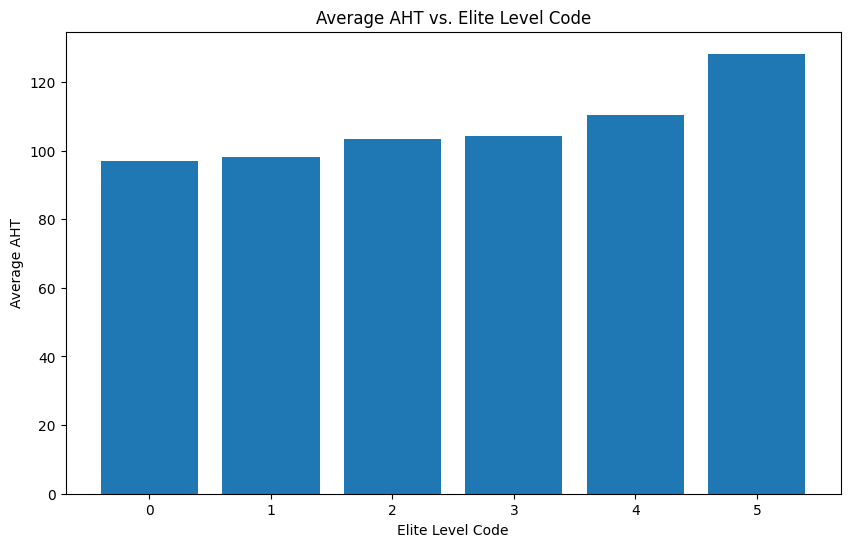

In [76]:

# where in x axis elite level code
# y axis avg AHT

import matplotlib.pyplot as plt

# Group by 'elite_level_code' and calculate the mean AHT for each group
aht_by_elite_level = merged_call_data.groupby('elite_level_code')['AHT'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(aht_by_elite_level.index, aht_by_elite_level.values)
plt.xlabel('Elite Level Code')
plt.ylabel('Average AHT')
plt.title('Average AHT vs. Elite Level Code')
plt.show()


<ipython-input-77-8ffca1a18cb8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aht_by_reason = merged_call_data.groupby('primary_call_reason')['AHT'].mean()


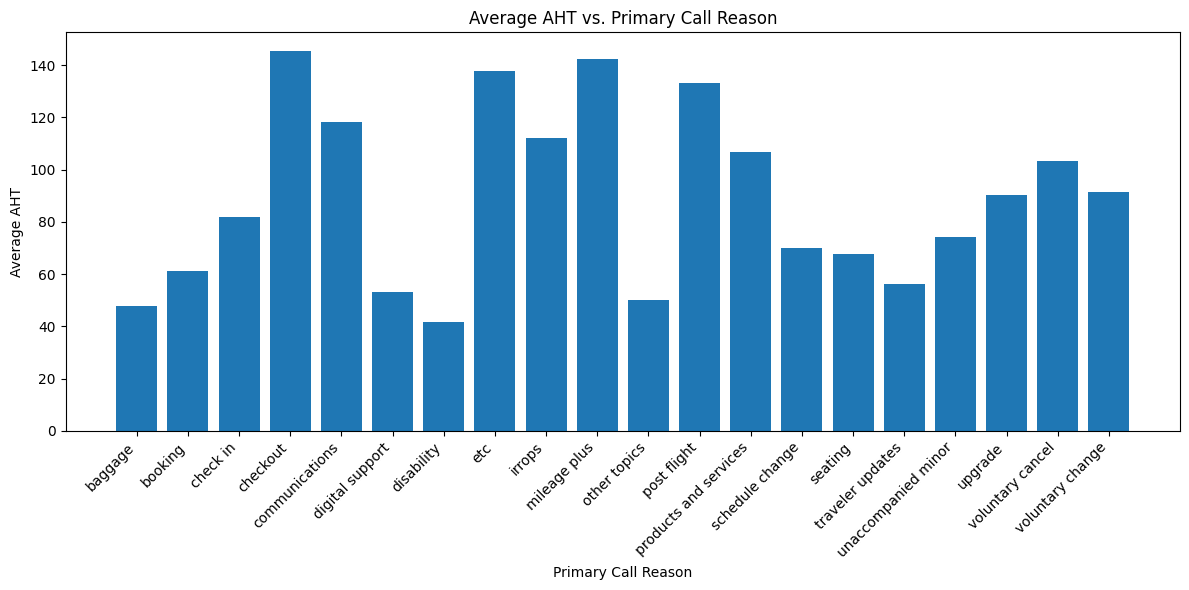

In [77]:

# where in x primary_call_reason
# y axis avg AHT

import matplotlib.pyplot as plt

# Group data by 'primary_call_reason' and calculate the mean AHT for each group
aht_by_reason = merged_call_data.groupby('primary_call_reason')['AHT'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(aht_by_reason.index, aht_by_reason.values)
plt.xlabel('Primary Call Reason')
plt.ylabel('Average AHT')
plt.title('Average AHT vs. Primary Call Reason')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


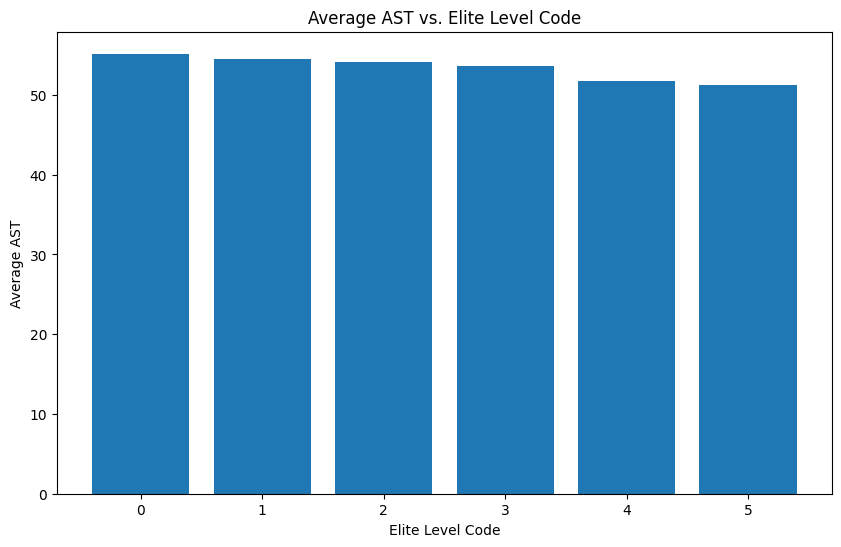

In [78]:

# T time vs elite_level_code
# where in x axis elite level code
# y axis avg AST

# Group data by 'elite_level_code' and calculate the mean AST for each group
ast_by_elite_level = merged_call_data.groupby('elite_level_code')['AST'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(ast_by_elite_level.index, ast_by_elite_level.values)
plt.xlabel('Elite Level Code')
plt.ylabel('Average AST')
plt.title('Average AST vs. Elite Level Code')
plt.show()


<ipython-input-79-63627427aa27>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ast_by_reason = merged_call_data.groupby('primary_call_reason')['AST'].mean()


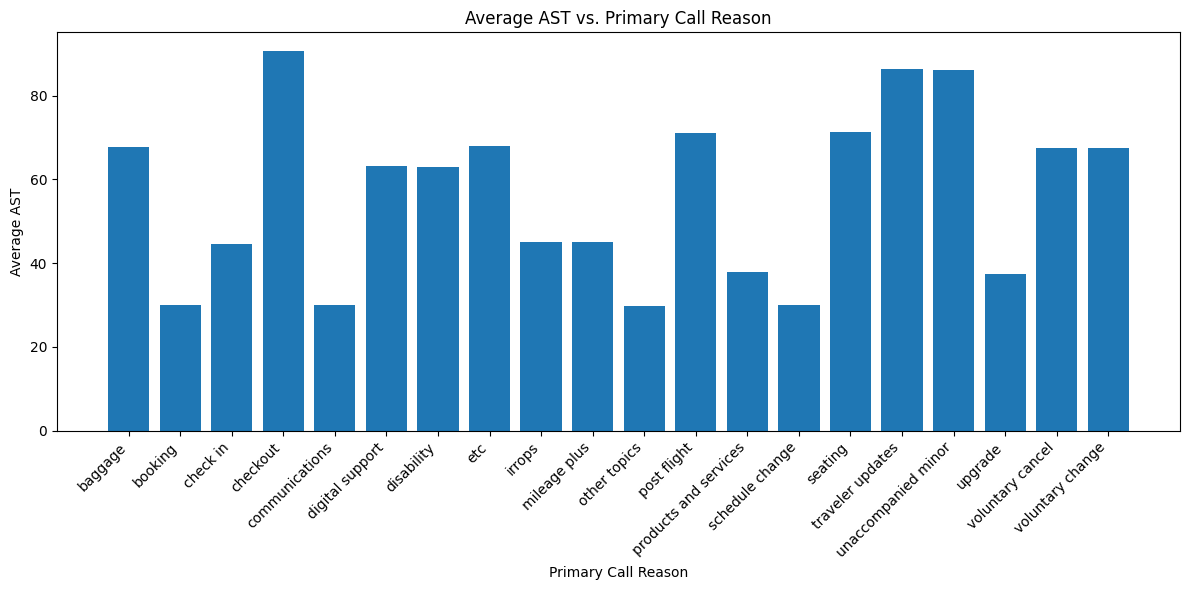

In [79]:

# where in x primary_call_reason
# y axis avg AST

# Group data by 'primary_call_reason' and calculate the mean AST for each group
ast_by_reason = merged_call_data.groupby('primary_call_reason')['AST'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(ast_by_reason.index, ast_by_reason.values)
plt.xlabel('Primary Call Reason')
plt.ylabel('Average AST')
plt.title('Average AST vs. Primary Call Reason')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


<ipython-input-80-d5b498cdb3b0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  call_counts = merged_call_data.groupby(['elite_level_code', 'primary_call_reason'])['call_id'].count().unstack()


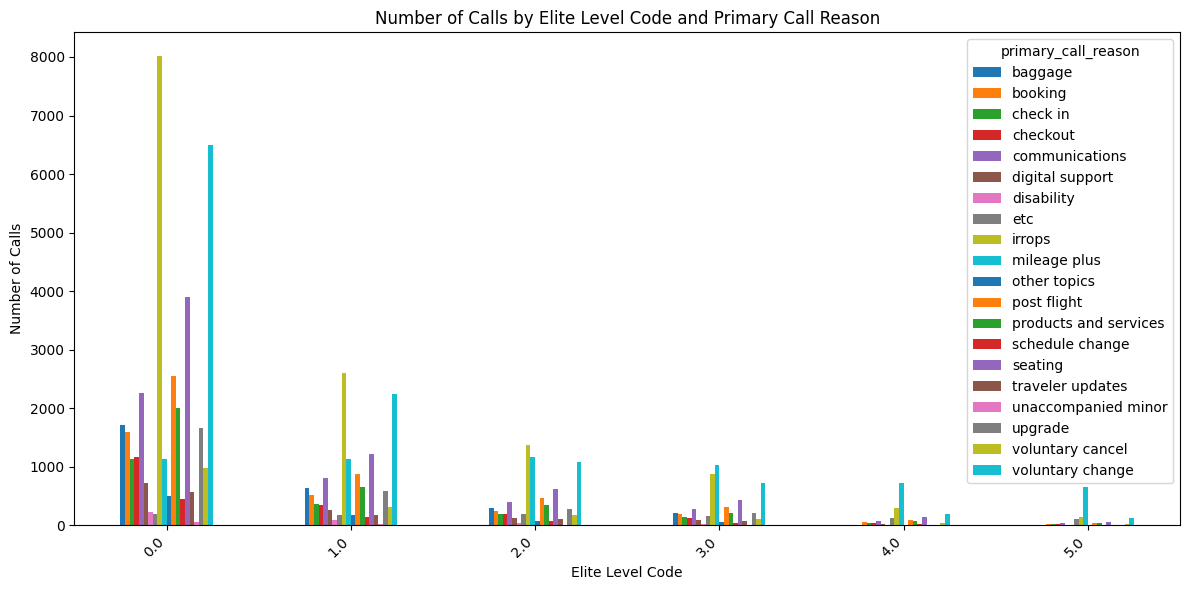

In [80]:

# x axis primary call re

import matplotlib.pyplot as plt

# Group the data by 'elite_level_code' and 'primary_call_reason', then count the occurrences
call_counts = merged_call_data.groupby(['elite_level_code', 'primary_call_reason'])['call_id'].count().unstack()

# Create a bar plot
ax = call_counts.plot(kind='bar', figsize=(12, 6))

# Set labels and title
plt.xlabel('Elite Level Code')
plt.ylabel('Number of Calls')
plt.title('Number of Calls by Elite Level Code and Primary Call Reason')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-81-97b8345c99f7>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aht_by_reason = merged_call_data.groupby('primary_call_reason')['AHT'].mean()


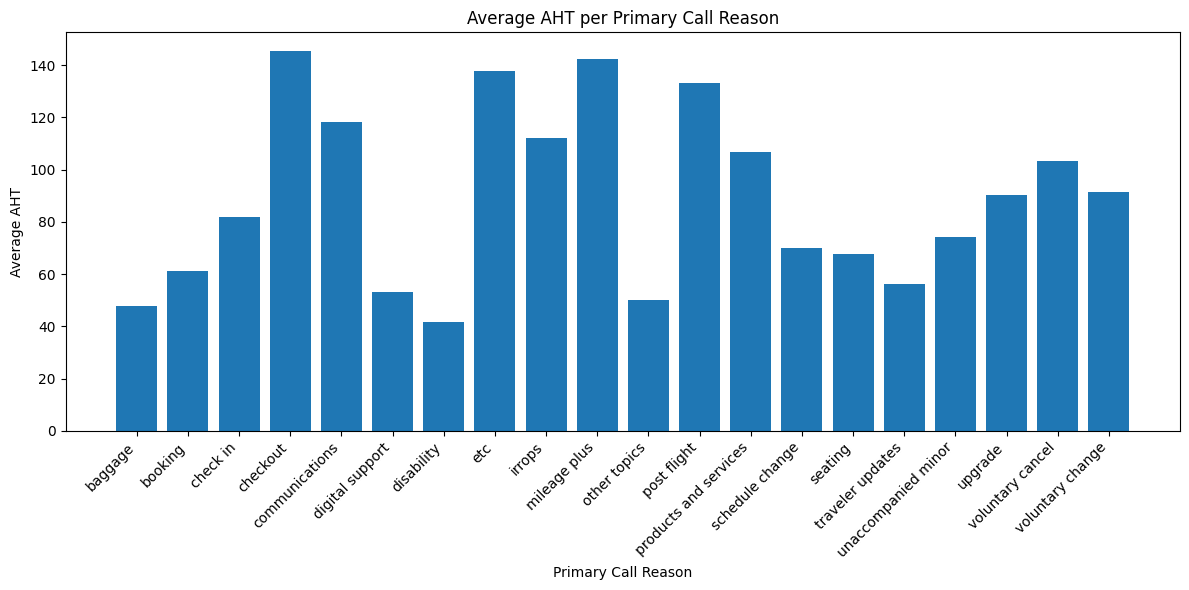

In [81]:


import matplotlib.pyplot as plt

# Group data by 'primary_call_reason' and calculate the mean AHT for each group
aht_by_reason = merged_call_data.groupby('primary_call_reason')['AHT'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(aht_by_reason.index, aht_by_reason.values)
plt.xlabel('Primary Call Reason')
plt.ylabel('Average AHT')
plt.title('Average AHT per Primary Call Reason')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()


<ipython-input-82-74864273bb6f>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agent_counts_by_reason = merged_call_data.groupby('primary_call_reason')['agent_id'].nunique()
<ipython-input-82-74864273bb6f>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_aht_by_reason = merged_call_data.groupby('primary_call_reason')['AHT'].mean()


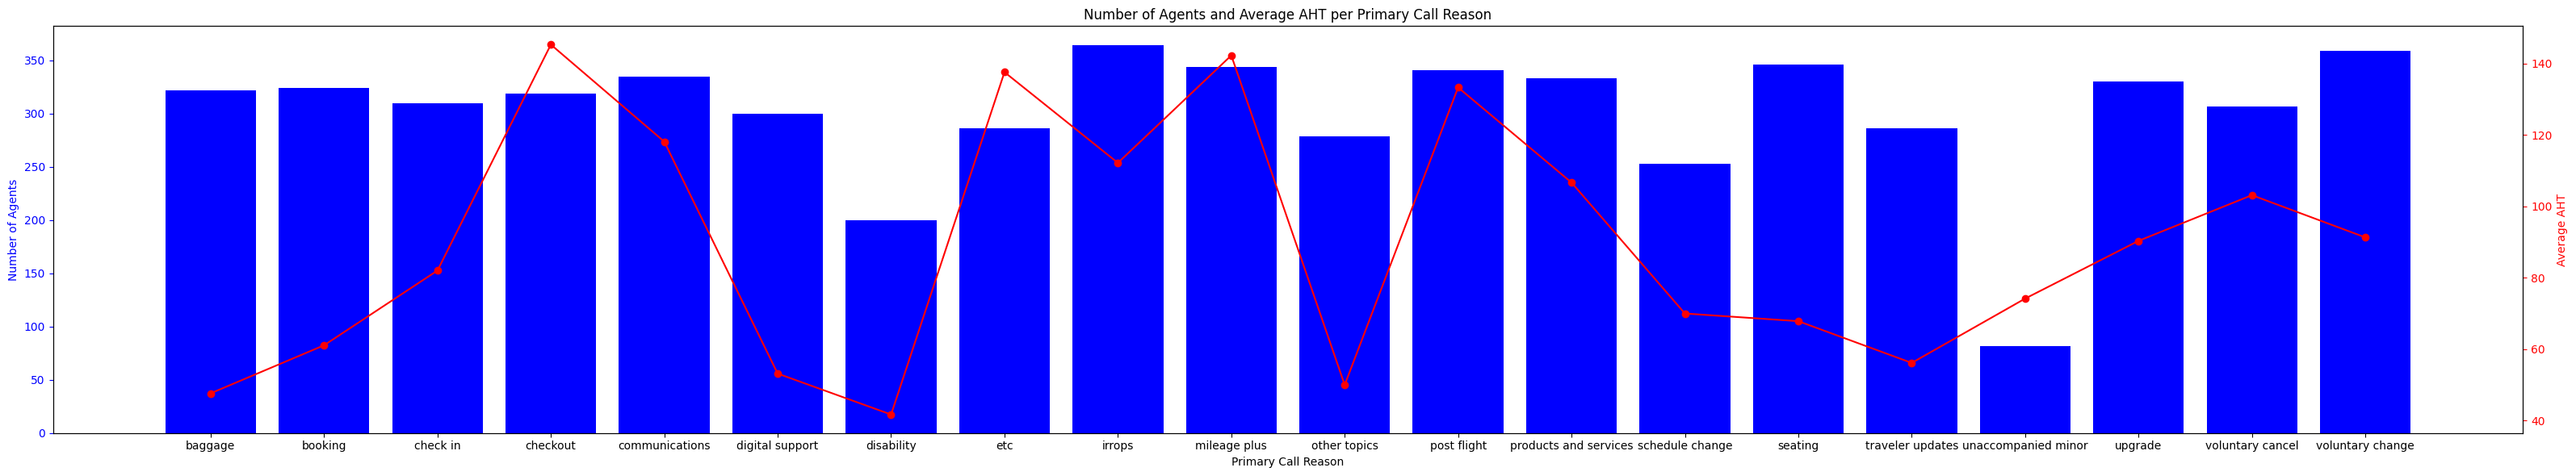

In [82]:


import matplotlib.pyplot as plt

# Group by 'primary_call_reason' and count the number of unique agents for each reason
agent_counts_by_reason = merged_call_data.groupby('primary_call_reason')['agent_id'].nunique()

# Calculate the average AHT for each call reason
average_aht_by_reason = merged_call_data.groupby('primary_call_reason')['AHT'].mean()

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(32, 6))

# Plot the number of agents on the primary y-axis
ax1.bar(agent_counts_by_reason.index, agent_counts_by_reason.values, color='blue')
ax1.set_xlabel('Primary Call Reason')
ax1.set_ylabel('Number of Agents', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for the average AHT
ax2 = ax1.twinx()
ax2.plot(average_aht_by_reason.index, average_aht_by_reason.values, color='red', marker='o')
ax2.set_ylabel('Average AHT', color='red')
ax2.tick_params('y', colors='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title of the plot
plt.title('Number of Agents and Average AHT per Primary Call Reason')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-83-d5b3bc665193>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agent_counts_by_reason = merged_call_data.groupby('primary_call_reason')['agent_id'].nunique()
<ipython-input-83-d5b3bc665193>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_ast_by_reason = merged_call_data.groupby('primary_call_reason')['AST'].mean()


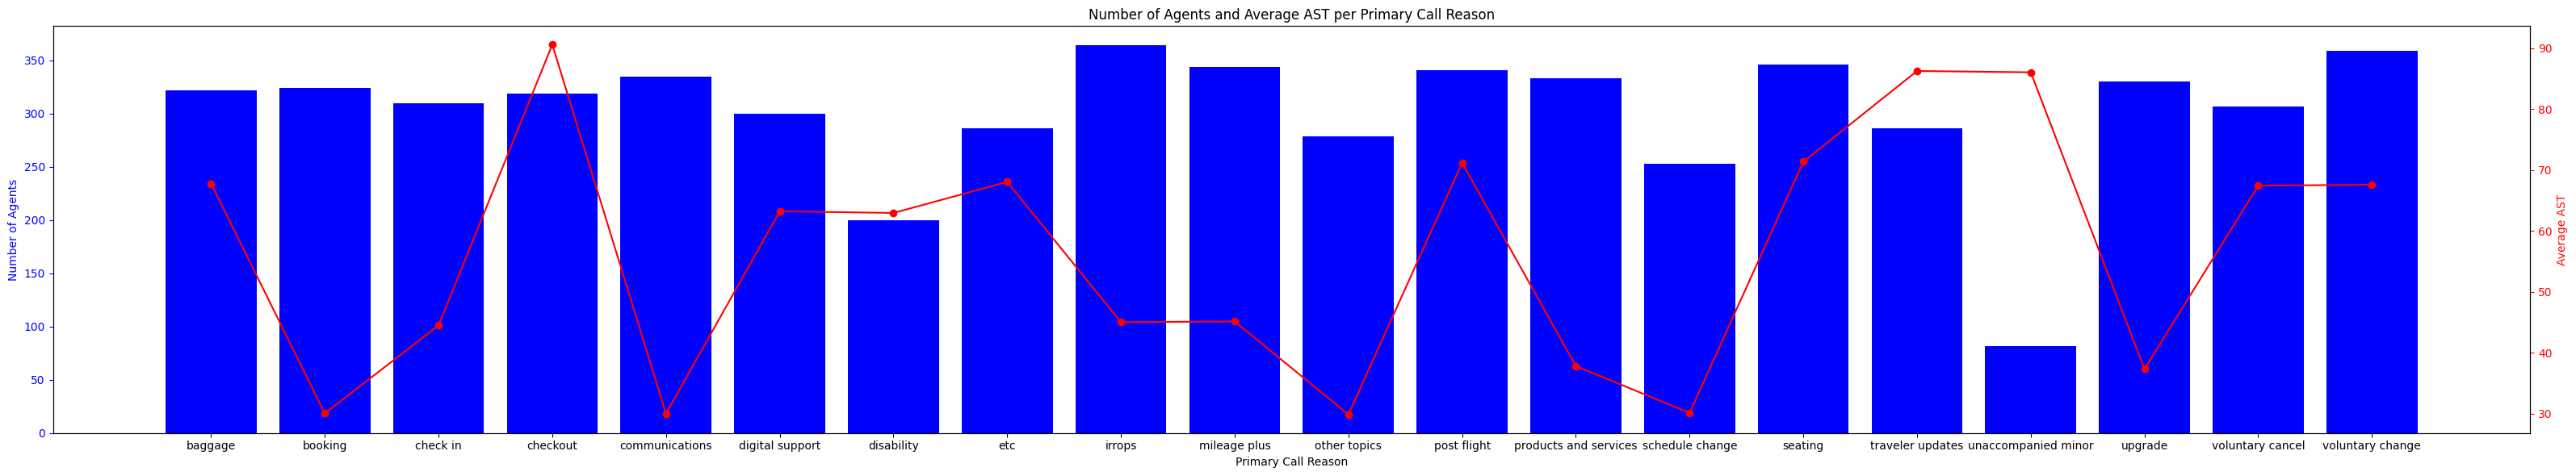

In [83]:

# Group by 'primary_call_reason' and count the number of unique agents for each reason
agent_counts_by_reason = merged_call_data.groupby('primary_call_reason')['agent_id'].nunique()

# Calculate the average AST for each call reason
average_ast_by_reason = merged_call_data.groupby('primary_call_reason')['AST'].mean()

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(32, 6))

# Plot the number of agents on the primary y-axis
ax1.bar(agent_counts_by_reason.index, agent_counts_by_reason.values, color='blue')
ax1.set_xlabel('Primary Call Reason')
ax1.set_ylabel('Number of Agents', color='blue')
ax1.tick_params('y', colors='blue')

# Create a secondary y-axis for the average AST
ax2 = ax1.twinx()
ax2.plot(average_ast_by_reason.index, average_ast_by_reason.values, color='red', marker='o')
ax2.set_ylabel('Average AST', color='red')
ax2.tick_params('y', colors='red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set the title of the plot
plt.title('Number of Agents and Average AST per Primary Call Reason')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
senti_data=pd.read_csv("/content/drive/MyDrive/sentiment_statisticscc1e57a.csv")

In [52]:
senti_data.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [84]:


# Fill null values in 'average_sentiment' and 'silence_percent_avergae' with 0
senti_data['average_sentiment'].fillna(0, inplace=True)


<ipython-input-84-b18ab0af1524>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  senti_data['average_sentiment'].fillna(0, inplace=True)


In [85]:


print(senti_data.describe())


            call_id       agent_id  average_sentiment  silence_percent_average
count  7.181000e+04   71810.000000       71810.000000             71810.000000
mean   4.993574e+09  564768.278039          -0.033468                 0.285515
std    2.889673e+09  257532.362167           0.143612                 0.192031
min    1.316420e+05  102574.000000          -1.380000                 0.000000
25%    2.480013e+09  347606.000000          -0.110000                 0.130000
50%    4.989448e+09  591778.000000          -0.020000                 0.260000
75%    7.493629e+09  786323.000000           0.050000                 0.410000
max    9.999806e+09  993862.000000           2.670000                 0.980000


In [86]:


# Find the most frequent 'agent_tone'
most_frequent_agent_tone = senti_data['agent_tone'].mode()[0]

# Fill NaN values in 'agent_tone' with the most frequent value
senti_data['agent_tone'].fillna(most_frequent_agent_tone, inplace=True)
print(most_frequent_agent_tone)

neutral


<ipython-input-86-5899bc976ab1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  senti_data['agent_tone'].fillna(most_frequent_agent_tone, inplace=True)


In [57]:
# Merge senti_data and merged_call_data based on a common column (e.g., call_id or agent_id)
merged_data = pd.merge(merged_call_data, senti_data, on='call_id', how='left')

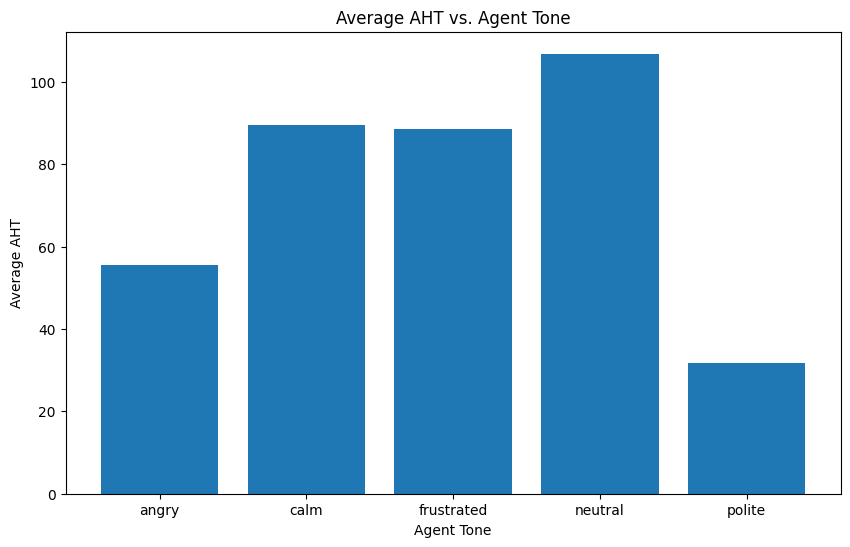

In [87]:

# x axis agent tone
# y axis aht

import matplotlib.pyplot as plt

# Group the data by 'agent_tone' and calculate the mean AHT for each group
aht_by_tone = merged_data.groupby('agent_tone')['AHT'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(aht_by_tone.index, aht_by_tone.values)
plt.xlabel('Agent Tone')
plt.ylabel('Average AHT')
plt.title('Average AHT vs. Agent Tone')
plt.show()



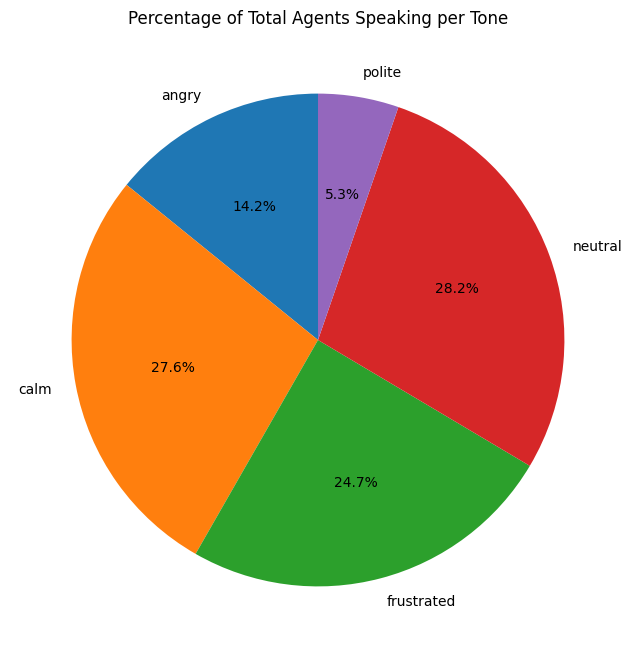

In [88]:


import matplotlib.pyplot as plt

# Group by 'agent_tone' and count the number of unique agents for each tone
agent_counts_by_tone = merged_data.groupby('agent_tone')['agent_id_x'].nunique()

# Calculate the percentage of total agents for each tone
total_agents = merged_data['agent_id_x'].nunique()
percentage_agents_by_tone = (agent_counts_by_tone / total_agents) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentage_agents_by_tone, labels=percentage_agents_by_tone.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Total Agents Speaking per Tone')
plt.show()


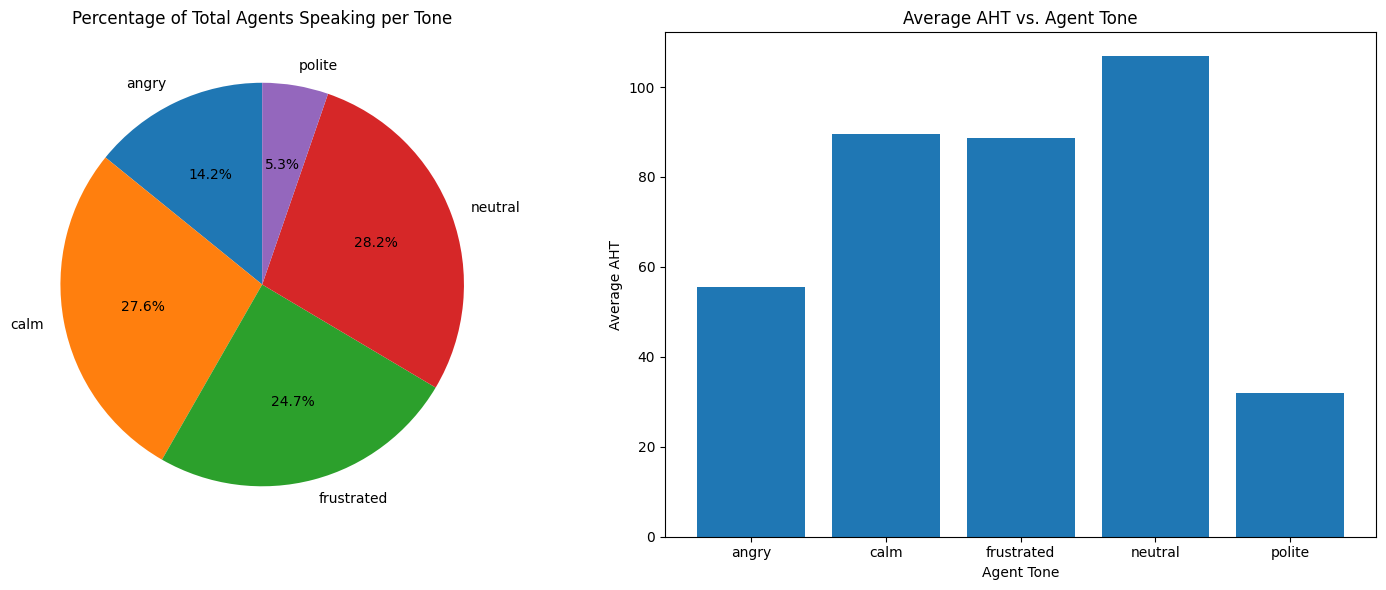

In [89]:

# x axis agent tone
# y axis aht
#  graph side by side

import matplotlib.pyplot as plt

# Group by 'agent_tone' and count the number of unique agents for each tone
agent_counts_by_tone = merged_data.groupby('agent_tone')['agent_id_x'].nunique()

# Calculate the percentage of total agents for each tone
total_agents = merged_data['agent_id_x'].nunique()
percentage_agents_by_tone = (agent_counts_by_tone / total_agents) * 100

# Create a pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # Create subplots for pie chart and histogram

ax1.pie(percentage_agents_by_tone, labels=percentage_agents_by_tone.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Percentage of Total Agents Speaking per Tone')

# Group the data by 'agent_tone' and calculate the mean AHT for each group
aht_by_tone = merged_data.groupby('agent_tone')['AHT'].mean()

# Create a histogram
ax2.bar(aht_by_tone.index, aht_by_tone.values)
ax2.set_xlabel('Agent Tone')
ax2.set_ylabel('Average AHT')
ax2.set_title('Average AHT vs. Agent Tone')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


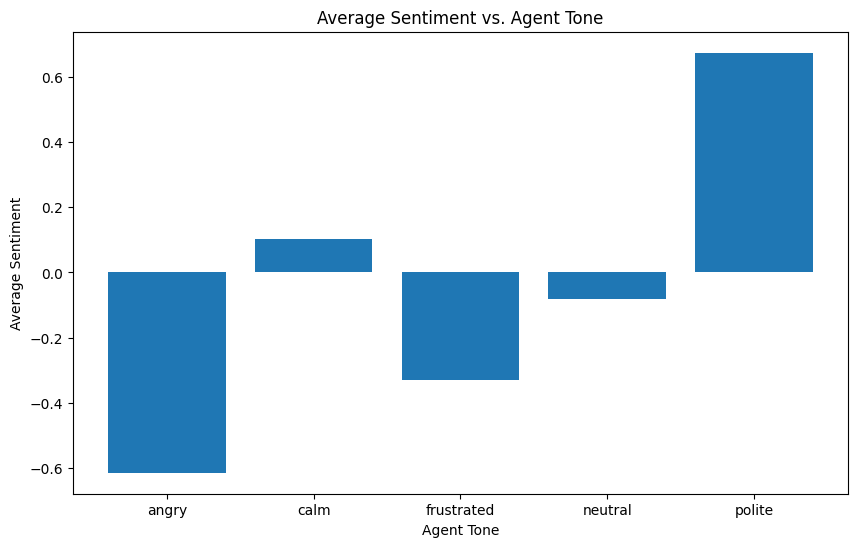

In [61]:
# prompt: graph between avergae sentiment vs agent tone

import matplotlib.pyplot as plt

# Group the data by 'agent_tone' and calculate the mean 'average_sentiment' for each group
sentiment_by_tone = merged_data.groupby('agent_tone')['average_sentiment'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sentiment_by_tone.index, sentiment_by_tone.values)
plt.xlabel('Agent Tone')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment vs. Agent Tone')
plt.show()


In [90]:


# Calculate the percentage of average sentiment greater than 0
percentage_positive_sentiment = (len(merged_data[merged_data['average_sentiment'] > 0]) / len(merged_data)) * 100

print(f"Percentage of average sentiment greater than 0: {percentage_positive_sentiment:.2f}%")


Percentage of average sentiment greater than 0: 34.45%


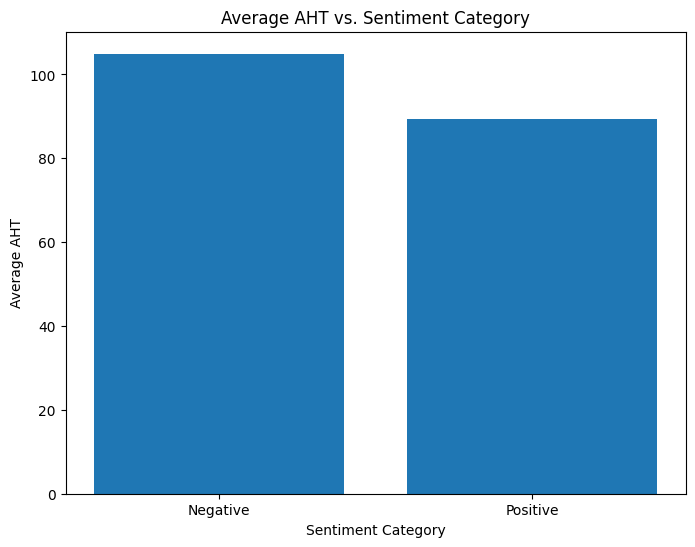

In [91]:


# Create a new column indicating whether sentiment is positive or negative
merged_data['sentiment_category'] = merged_data['average_sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Group by sentiment category and calculate average AHT
aht_by_sentiment_category = merged_data.groupby('sentiment_category')['AHT'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(aht_by_sentiment_category.index, aht_by_sentiment_category.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Average AHT')
plt.title('Average AHT vs. Sentiment Category')
plt.show()


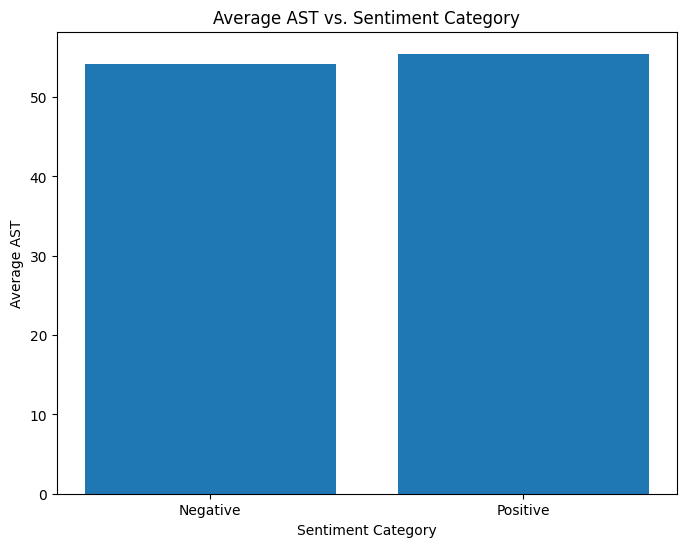

In [64]:
# prompt: graph of AST vs sentiment percentage less than 0 and greater than 0

import matplotlib.pyplot as plt

# Create a new column indicating whether sentiment is positive or negative
merged_data['sentiment_category'] = merged_data['average_sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

# Group by sentiment category and calculate average AST
ast_by_sentiment_category = merged_data.groupby('sentiment_category')['AST'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(ast_by_sentiment_category.index, ast_by_sentiment_category.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Average AST')
plt.title('Average AST vs. Sentiment Category')
plt.show()


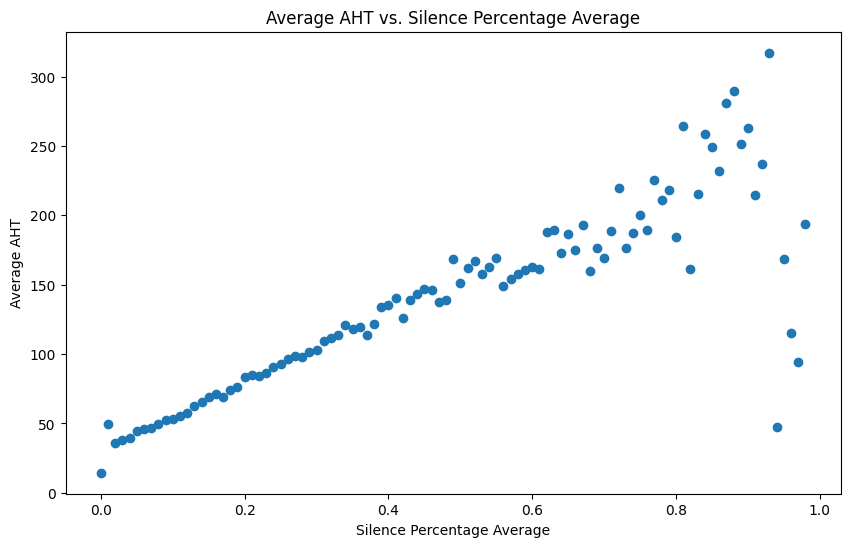

In [92]:


import matplotlib.pyplot as plt

# Group by 'silence_percent_avergae' and calculate average AHT
aht_by_silence = merged_data.groupby('silence_percent_average')['AHT'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(aht_by_silence.index, aht_by_silence.values)
plt.xlabel('Silence Percentage Average')
plt.ylabel('Average AHT')
plt.title('Average AHT vs. Silence Percentage Average')
plt.show()


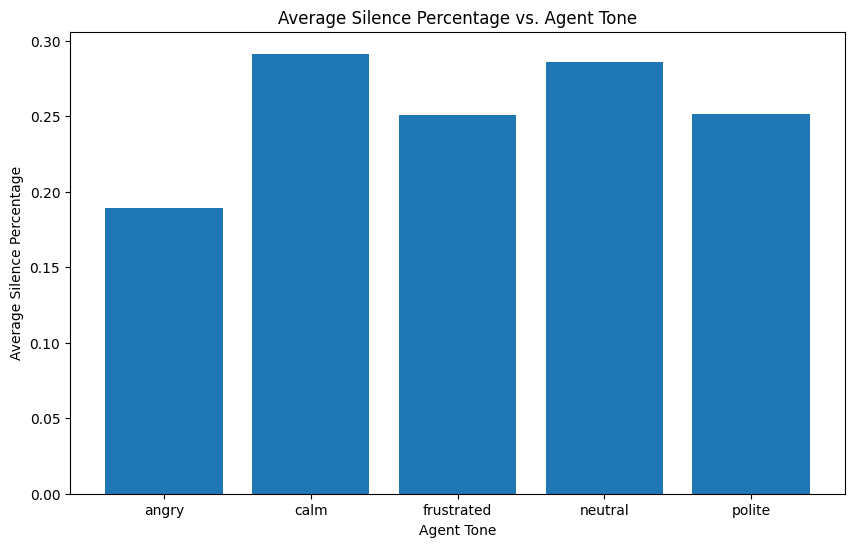

In [93]:


# Group the data by 'agent_tone' and calculate the mean 'silence_percent_avergae' for each group
silence_by_tone = merged_data.groupby('agent_tone')['silence_percent_average'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(silence_by_tone.index, silence_by_tone.values)
plt.xlabel('Agent Tone')
plt.ylabel('Average Silence Percentage')
plt.title('Average Silence Percentage vs. Agent Tone')
plt.show()


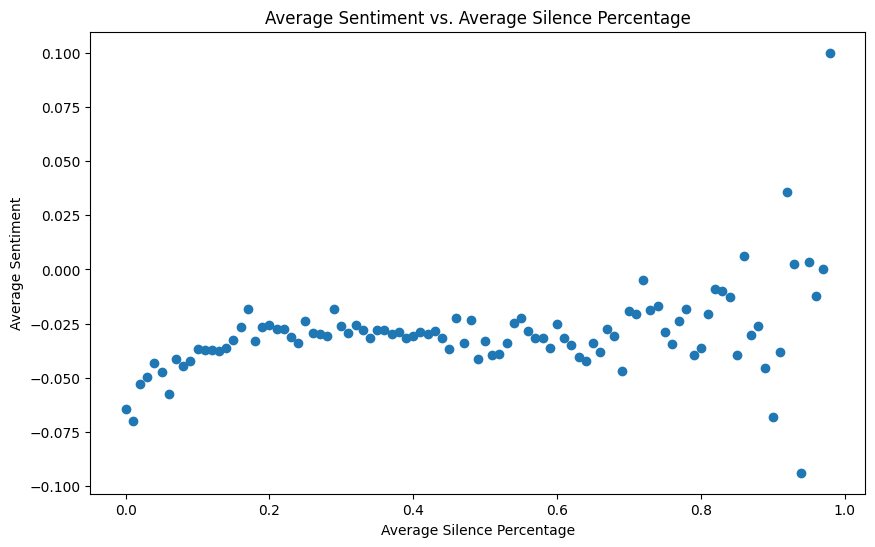

In [94]:


# Group the data by 'silence_percent_avergae' and calculate the mean 'average_sentiment' for each group
sentiment_by_silence = merged_data.groupby('silence_percent_average')['average_sentiment'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sentiment_by_silence.index, sentiment_by_silence.values)
plt.xlabel('Average Silence Percentage')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment vs. Average Silence Percentage')
plt.show()


<ipython-input-95-9c35aed6f677>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aht_by_reason = merged_data.groupby('primary_call_reason')['AHT'].mean()


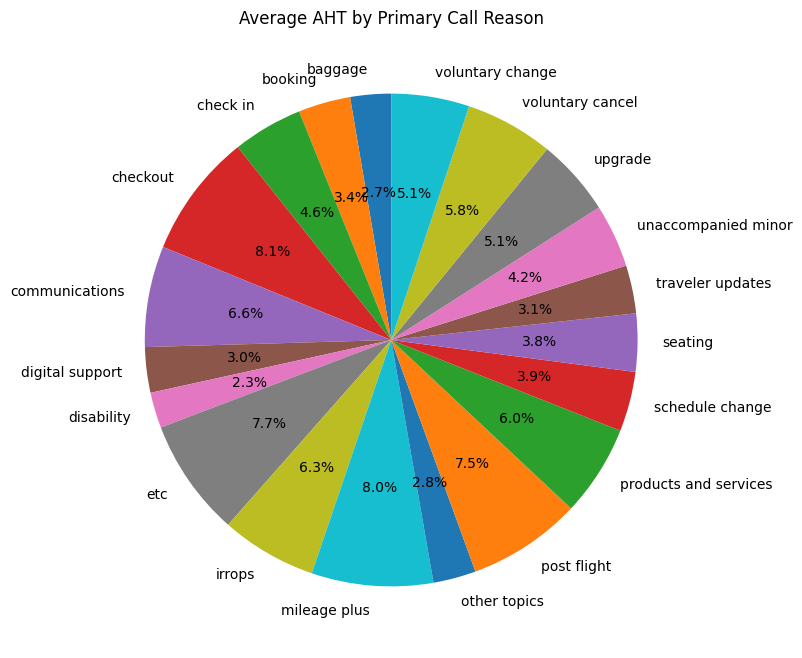

In [95]:


# Group by 'primary_call_reason' and calculate the mean AHT for each group
aht_by_reason = merged_data.groupby('primary_call_reason')['AHT'].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(aht_by_reason, labels=aht_by_reason.index, autopct='%1.1f%%', startangle=90)
plt.title('Average AHT by Primary Call Reason')
plt.show()
